#### 타이타닉 데이터를 활용한 승선자의 생사여부 예측
##### EDA를 활용한 Feature, Target 구성 여부 확인

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv("../Data/train.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Age의 컬럼 선택 여부 확인 : 결측치가 20% 이상이면 해당 컬럼은 사용할 수 없다.
(len(train_df)-train_df['Age'].count()) / len(train_df) * 100 # (891-714)/891

np.float64(19.865319865319865)

In [5]:
# Age가 null인 컬럼과 null이 아닌 dataframe 생성하기
age_null = train_df[train_df.Age.isnull()]
age_not_null = train_df[train_df.Age.notnull()]
len(age_null) + len(age_not_null)

891

In [6]:
# Survived와 Pclass 기준으로 Dataset 정렬 : 정렬 후 index 재정렬
train_df = train_df.sort_values(by=['Survived', 'Pclass']).reset_index(drop=True)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
1,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
2,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
3,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
4,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S


In [7]:
train_df.shape

(891, 12)

In [8]:
# Survived 기준으로 생존과 사망의 Count 확인
print(f"사망자수 : {train_df[train_df.Survived == 0].shape[0]}")
print(f"생존자수 : {train_df[train_df.Survived == 1].shape[0]}")

사망자수 : 549
생존자수 : 342


In [9]:
# 생존과 사망의 DataFrame 만들기
result = [train_df[train_df.Survived == 0].shape[0], train_df[train_df.Survived == 1].shape[0]]

live_death = pd.DataFrame({'Result':result}, index=['사망', '생존'])
live_death

,Result
사망,549
생존,342


In [10]:
# Pie Chart
import matplotlib.pyplot as plt
import koreanize_matplotlib

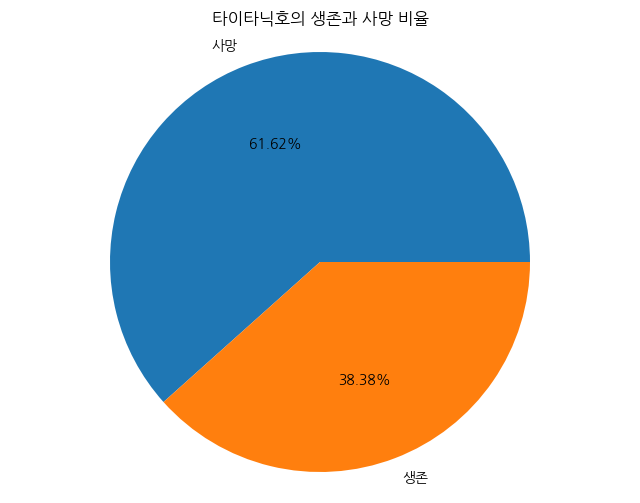

In [11]:
plt.figure(figsize=(8,6))

live_death.Result.plot(
    kind='pie',
    autopct='%.2f%%'
)

plt.title('타이타닉호의 생존과 사망 비율')
plt.axis('equal')
plt.ylabel('')

plt.show()

> Target의 비율이 60%보다 크므로 Target으로 약간 아쉽지만 적합하다.

---
#### Feature 컬럼 선택

In [12]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
1,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
2,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
3,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
4,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S


#### Sex 컬럼이 Feature로 적합한지 확인
: null도 없고 category 개수도 적다.

In [13]:
train_df.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

> 남성의 승선 수가 여성의 승선 수 보다 거의 2배이다.     
Feature는 차이가 특성이 필요한데, 일단 승선수만 보면 Feature로 사용할 수 있을 것 같다.

#### Target 컬럼과 연결하여 Feature가 될 수 있는지 확인

In [14]:
# 여성의 생존과 사망 수
female_survived = train_df[(train_df.Sex == 'female') & (train_df.Survived == 1)].shape[0]
female_death= train_df[(train_df.Sex == 'female') & (train_df.Survived == 0)].shape[0]
male_survived = train_df[(train_df.Sex == 'male') & (train_df.Survived == 1)].shape[0]
male_death= train_df[(train_df.Sex == 'male') & (train_df.Survived == 0)].shape[0]

print(f"여성의 생존 수는 {female_survived}이고 사망 수는 {female_death}이다.")
print(f"남성의 생존 수는 {male_survived}이고 사망 수는 {male_death}이다.")

여성의 생존 수는 233이고 사망 수는 81이다.
남성의 생존 수는 109이고 사망 수는 468이다.


> 여성과 남성의 생존 여부를 연결하여 특징을 보았는데 성별로 정반대의 특징이 나타난다.    
Sex 컬럼은 Feature로서 충분하다.

----
#### Pclass의 Feature 확인

In [15]:
# Pclass의 Category 분포 확인
train_df.Pclass.value_counts().sort_index()

Pclass
1    216
2    184
3    491
Name: count, dtype: int64

> 객실의 등급별 인원수로 보아 1,2 등급은 크게 차이나지 않지만, 1과 3 그리고 2와 3 등급은 차이가 있어 Feature의 가능성이 보임

#### [Survived] <-> [Sex, Pclass] 확인

In [16]:
# l등 객실의 여성 생존율
female_count = train_df[(train_df.Sex == 'female') & (train_df.Pclass == 1)].shape[0]
female_live = train_df[(train_df.Sex == 'female') & (train_df.Pclass == 1) & (train_df.Survived == 1)].shape[0]

print(f"1등 객실의 여성의 생존율은 {female_live}/{female_count}로 {round(female_live/female_count*100)}% 이다.")

1등 객실의 여성의 생존율은 91/94로 97% 이다.


In [17]:
# l, 2, 3등 객실의 여성 / 남성 생존율

for s in train_df.Sex.unique():
    for i in train_df.Pclass.unique():
        female_count = train_df[(train_df.Sex == s) & (train_df.Pclass == i)].shape[0]
        female_live = train_df[(train_df.Sex == s) & (train_df.Pclass == i) & (train_df.Survived == 1)].shape[0]
        print(f"{i}등 객실의 {'여성' if s == 'female' else '남성'}의 생존율은 {female_live}/{female_count:>3}로 {round(female_live/female_count*100, 2):>0.2f}% 이다.")
    print("-"*50)

1등 객실의 남성의 생존율은 45/122로 36.89% 이다.
2등 객실의 남성의 생존율은 17/108로 15.74% 이다.
3등 객실의 남성의 생존율은 47/347로 13.54% 이다.
--------------------------------------------------
1등 객실의 여성의 생존율은 91/ 94로 96.81% 이다.
2등 객실의 여성의 생존율은 70/ 76로 92.11% 이다.
3등 객실의 여성의 생존율은 72/144로 50.00% 이다.
--------------------------------------------------


#### [Survived] <- [Sex, Pclass]로 결정

In [18]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
1,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
2,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
3,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
4,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S


In [19]:
# NaN인 데이터 찾기
train_df[train_df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
556,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
672,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [20]:
# 항구별 승선 인원
train_df.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

> nan -> S

In [21]:
train_df.loc[train_df.Embarked.isnull(), 'Embarked'] = 'S'
train_df.Embarked.value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [22]:
# 항구별 성별 승선 인원
train_df.groupby(['Embarked', 'Sex']).size()

Embarked  Sex   
C         female     73
          male       95
Q         female     36
          male       41
S         female    205
          male      441
dtype: int64

In [23]:
# 항구별 생존 인원
train_df.groupby(['Embarked', 'Survived']).size()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           219
dtype: int64

In [24]:
# 항구별 객실등급별 인원
train_df.groupby(['Embarked', 'Pclass']).size()

Embarked  Pclass
C         1          85
          2          17
          3          66
Q         1           2
          2           3
          3          72
S         1         129
          2         164
          3         353
dtype: int64

----
#### [Survived] <- [Sex, Pclass, Embarked]

In [25]:
train = train_df[['Survived', 'Sex', 'Pclass', 'Embarked']]
train.head()

,Survived,Sex,Pclass,Embarked
0,0,male,1,S
1,0,male,1,S
2,0,male,1,C
3,0,male,1,C
4,0,male,1,S


In [26]:
# Sex 컬럼을 SexCode로 숫자화 시킨다.
train['SexCode'] = train['Sex'].map({'female':0, 'male':1})
train.head()

,Survived,Sex,Pclass,Embarked,SexCode
0,0,male,1,S,1
1,0,male,1,S,1
2,0,male,1,C,1
3,0,male,1,C,1
4,0,male,1,S,1


In [27]:
# Sex 컬럼을 SexCode로 숫자화 시킨다.
train.loc[train.Sex == 'female', 'SexCode'] = 0
train.loc[train.Sex == 'male', 'SexCode'] = 1
train.head()

,Survived,Sex,Pclass,Embarked,SexCode
0,0,male,1,S,1
1,0,male,1,S,1
2,0,male,1,C,1
3,0,male,1,C,1
4,0,male,1,S,1


In [28]:
# Sex 컬럼 삭제
del train['Sex']
train.head()

,Survived,Pclass,Embarked,SexCode
0,0,1,S,1
1,0,1,S,1
2,0,1,C,1
3,0,1,C,1
4,0,1,S,1


In [29]:
# One-hot-encoding으로 Embarked 정리
train_ml = pd.get_dummies(data=train, columns=['Embarked'])
train_ml.head()

,Survived,Pclass,SexCode,Embarked_C,Embarked_Q,Embarked_S
0,0,1,1,False,False,True
1,0,1,1,False,False,True
2,0,1,1,True,False,False
3,0,1,1,True,False,False
4,0,1,1,False,False,True


----
#### RandomForest로 예측 확인

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [31]:
# Train과 Test 분리
train_data, test_data, train_target, test_target = train_test_split(train_ml.loc[:,'Pclass':], train_ml['Survived'], random_state=42, stratify=train_ml['Survived'])

In [32]:
print(train_data.shape)
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)

(668, 5)
(223, 5)
(668,)
(223,)


In [33]:
# 데이터 학습시키고 예측하기
clf = RandomForestClassifier()

clf.fit(train_data, train_target)
print("Train :", clf.score(train_data, train_target))
print("Test  :", clf.score(test_data, test_target))

Train : 0.8053892215568862
Test  : 0.8295964125560538


In [34]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score

In [35]:
pred = clf.predict(test_data)
accuracy_score(test_target, pred)

0.8295964125560538

In [36]:
conf_matrix = confusion_matrix(test_target, pred)
conf_matrix

array([[131,   6],
       [ 32,  54]])

In [37]:
print("사망 :", 131/(131+6))
print("생존 :", 54/(32+54))

사망 : 0.9562043795620438
생존 : 0.627906976744186


#### Cross Validation

In [38]:
from sklearn.model_selection import cross_val_score

In [39]:
scores = cross_val_score(clf, train_ml.loc[:,'Pclass':], train_ml['Survived'], cv=5, scoring='accuracy')
scores

array([0.54189944, 0.83707865, 0.89325843, 0.76966292, 0.64606742])

In [40]:
scores.mean()

np.float64(0.737593371414224)

In [41]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [42]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
1,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
2,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
3,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
4,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S


In [43]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
1,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,6
2,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,1
3,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C,2
4,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S,2


In [44]:
train_df.groupby(['FamilySize','Survived']).size()

FamilySize  Survived
1           0           374
            1           163
2           0            72
            1            89
3           0            43
            1            59
4           0             8
            1            21
5           0            12
            1             3
6           0            19
            1             3
7           0             8
            1             4
8           0             6
11          0             7
dtype: int64

In [45]:
train_age = train_df.groupby(['Age','Survived']).size()

In [46]:
# Sex 컬럼을 SexCode로 숫자화 시킨다.
train_df.loc[train_df.Sex == 'female', 'SexCode'] = 0
train_df.loc[train_df.Sex == 'male', 'SexCode'] = 1
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,SexCode
0,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,1.0
1,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,6,1.0
2,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,1,1.0
3,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C,2,1.0
4,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S,2,1.0


In [47]:
df = train_df

# 나이 구간 나누기
bins = [0,10,20,30,40,50,60,70,80]
df['AgeGroup'] = pd.cut(df['Age'], bins=bins)

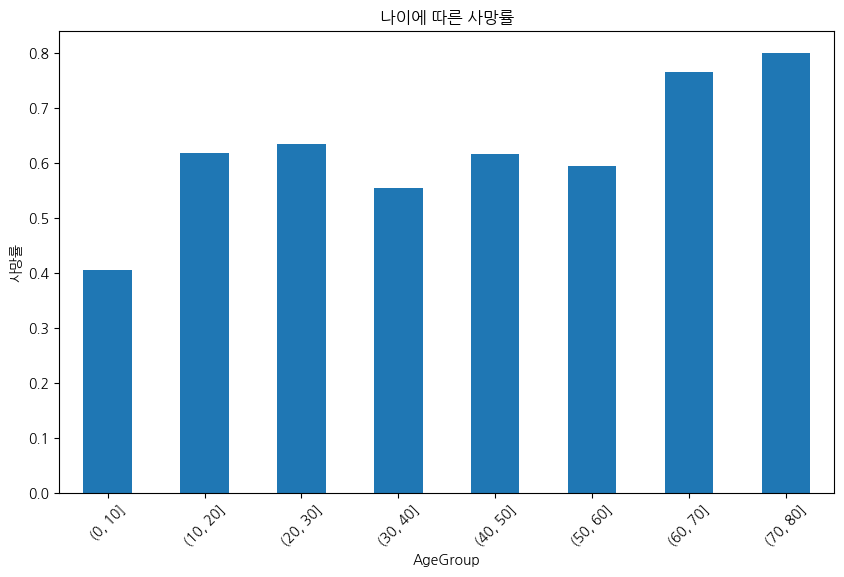

In [48]:
bins = [0,10,20,30,40,50,60,70,80]
df['AgeGroup'] = pd.cut(df['Age'], bins=bins)

age_ratio = df.groupby('AgeGroup')['Survived'].mean()

death_ratio = 1 - age_ratio

death_ratio.plot(kind='bar', figsize=(10,6))
plt.ylabel('사망률')
plt.title('나이에 따른 사망률')
plt.xticks(rotation=45)
plt.show()

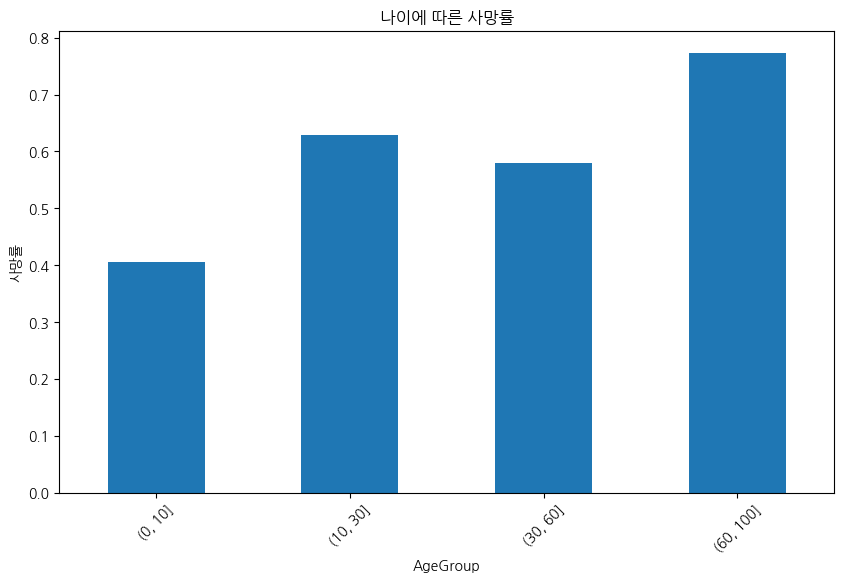

In [49]:
bins = [0,10,30,60,100]
df['AgeGroup'] = pd.cut(df['Age'], bins=bins)

age_ratio = df.groupby('AgeGroup')['Survived'].mean()

death_ratio = 1 - age_ratio

death_ratio.plot(kind='bar', figsize=(10,6))
plt.ylabel('사망률')
plt.title('나이에 따른 사망률')
plt.xticks(rotation=45)
plt.show()

In [50]:
df.Age.max()

80.0

In [51]:
bins = [0,10,30,60,80]
df['AgeGroup'] = pd.cut(df['Age'], bins=bins)
df['AgeGroup'].value_counts()

AgeGroup
(10, 30]    345
(30, 60]    283
(0, 10]      64
(60, 80]     22
Name: count, dtype: int64

In [52]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,SexCode,AgeGroup
0,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,1.0,"(30, 60]"
1,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,6,1.0,"(10, 30]"
2,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,1,1.0,"(30, 60]"
3,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C,2,1.0,"(10, 30]"
4,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S,2,1.0,"(30, 60]"


In [53]:
print(df['Age'][df.Pclass==1].mean())
print(df['Age'][df.Pclass==2].mean())
print(df['Age'][df.Pclass==3].mean())

38.233440860215055
29.87763005780347
25.14061971830986


In [54]:
print(df['Age'][df.SexCode==0].mean())
print(df['Age'][df.SexCode==1].mean())

27.915708812260537
30.72664459161148


In [55]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,SexCode,AgeGroup
0,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,1.0,"(30, 60]"
1,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,6,1.0,"(10, 30]"
2,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,1,1.0,"(30, 60]"
3,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C,2,1.0,"(10, 30]"
4,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S,2,1.0,"(30, 60]"


In [56]:
df['Fare1'] = df['Fare'] / df['FamilySize']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,SexCode,AgeGroup,Fare1
0,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,1.0,"(30, 60]",51.862500
1,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,6,1.0,"(10, 30]",43.833333
2,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,1,1.0,"(30, 60]",27.720800
3,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C,2,1.0,"(10, 30]",41.085400
4,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S,2,1.0,"(30, 60]",26.000000


In [57]:
print(df['Fare1'][df.Pclass==1].mean())
print(df['Fare1'][df.Pclass==2].mean())
print(df['Fare1'][df.Pclass==3].mean())

52.936943441358025
12.698831793478261
8.094756397933363


In [58]:
print(df['Age'][df.Pclass==1].mean())
print(df['Age'][df.Pclass==2].mean())
print(df['Age'][df.Pclass==3].mean())

38.233440860215055
29.87763005780347
25.14061971830986


In [59]:
df_pc1 = df[df.Pclass==1]
df_pc2 = df[df.Pclass==2]
df_pc3 = df[df.Pclass==3]
df_pc1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,SexCode,AgeGroup,Fare1
0,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,1.0,"(30, 60]",51.862500
1,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,6,1.0,"(10, 30]",43.833333
2,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,1,1.0,"(30, 60]",27.720800
3,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C,2,1.0,"(10, 30]",41.085400
4,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S,2,1.0,"(30, 60]",26.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S,1,0.0,"(30, 60]",25.929200
681,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,3,0.0,"(30, 60]",17.518067
682,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,2,0.0,"(30, 60]",41.579150
683,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,0.0,"(10, 30]",30.000000


In [60]:
import seaborn as sns

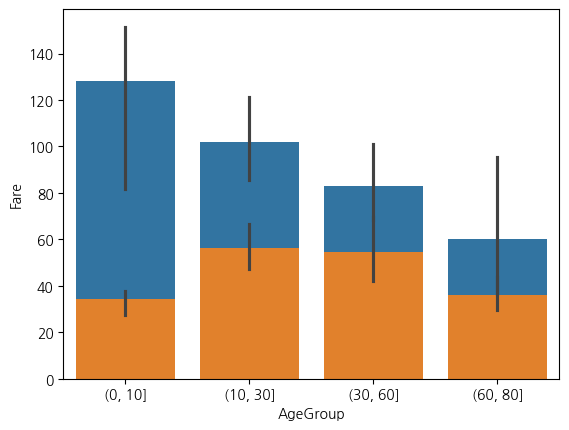

In [61]:
sns.barplot(x='AgeGroup', y='Fare', data=df_pc1)
sns.barplot(x='AgeGroup', y='Fare1', data=df_pc1)

plt.show()

In [62]:
df = df.iloc[:,[1,2,3,8,10,11,12,13,14,15]]
df.head()

,Survived,Pclass,Name,Ticket,Cabin,Embarked,FamilySize,SexCode,AgeGroup,Fare1
0,0,1,"McCarthy, Mr. Timothy J",17463,E46,S,1,1.0,"(30, 60]",51.862500
1,0,1,"Fortune, Mr. Charles Alexander",19950,C23 C25 C27,S,6,1.0,"(10, 30]",43.833333
2,0,1,"Uruchurtu, Don. Manuel E",PC 17601,NaN,C,1,1.0,"(30, 60]",27.720800
3,0,1,"Meyer, Mr. Edgar Joseph",PC 17604,NaN,C,2,1.0,"(10, 30]",41.085400
4,0,1,"Holverson, Mr. Alexander Oskar",113789,NaN,S,2,1.0,"(30, 60]",26.000000


In [63]:
df[df.AgeGroup.isnull()]

,Survived,Pclass,Name,Ticket,Cabin,Embarked,FamilySize,SexCode,AgeGroup,Fare1
7,0,1,"Stewart, Mr. Albert A",PC 17605,NaN,C,1,1.0,NaN,27.720800
18,0,1,"Baumann, Mr. John D",PC 17318,NaN,S,1,1.0,NaN,25.925000
22,0,1,"Rood, Mr. Hugh Roscoe",113767,A32,S,1,1.0,NaN,50.000000
27,0,1,"Cairns, Mr. Alexander",113798,NaN,S,1,1.0,NaN,31.000000
29,0,1,"Smith, Mr. Richard William",113056,A19,S,1,1.0,NaN,26.000000
...,...,...,...,...,...,...,...,...,...,...
868,1,3,"Lam, Mr. Ali",1601,NaN,S,1,1.0,NaN,56.495800
869,1,3,"Mullens, Miss. Katherine ""Katie""",35852,NaN,Q,1,0.0,NaN,7.733300
870,1,3,"Moubarek, Master. Halim Gonios (""William George"")",2661,NaN,C,3,1.0,NaN,5.081933
871,1,3,"Mannion, Miss. Margareth",36866,NaN,Q,1,0.0,NaN,7.737500


In [64]:
df.head()

,Survived,Pclass,Name,Ticket,Cabin,Embarked,FamilySize,SexCode,AgeGroup,Fare1
0,0,1,"McCarthy, Mr. Timothy J",17463,E46,S,1,1.0,"(30, 60]",51.862500
1,0,1,"Fortune, Mr. Charles Alexander",19950,C23 C25 C27,S,6,1.0,"(10, 30]",43.833333
2,0,1,"Uruchurtu, Don. Manuel E",PC 17601,NaN,C,1,1.0,"(30, 60]",27.720800
3,0,1,"Meyer, Mr. Edgar Joseph",PC 17604,NaN,C,2,1.0,"(10, 30]",41.085400
4,0,1,"Holverson, Mr. Alexander Oskar",113789,NaN,S,2,1.0,"(30, 60]",26.000000


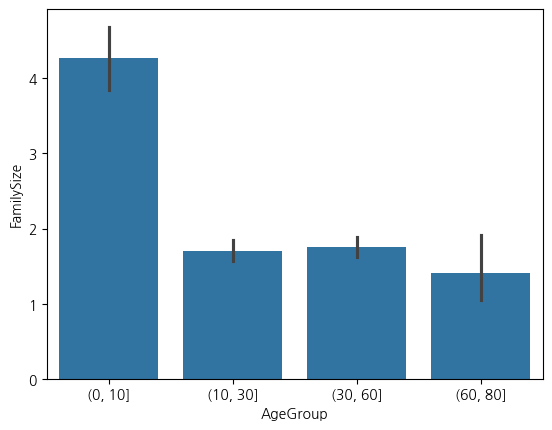

In [65]:
sns.barplot(x='AgeGroup',y='FamilySize',data=df)
plt.show()

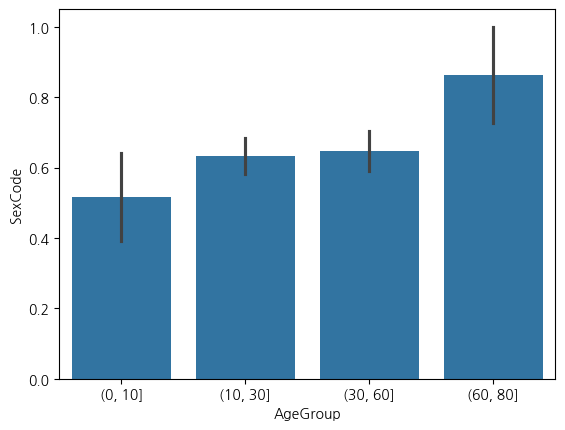

In [66]:
sns.barplot(x='AgeGroup',y='SexCode',data=df)
plt.show()

<Axes: ylabel='Fare1'>

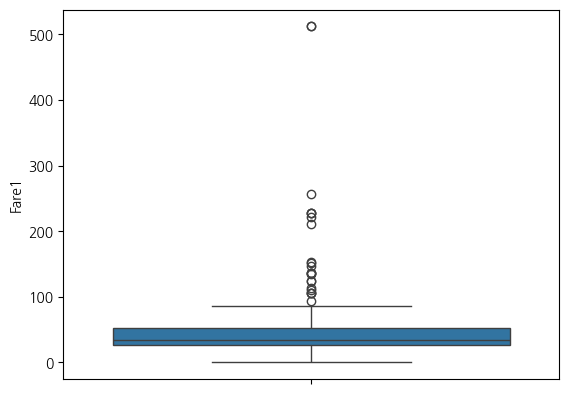

In [67]:
sns.boxplot(df_pc1['Fare1'])

In [68]:
df1 = train_df
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,SexCode,AgeGroup,Fare1
0,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,1.0,"(30, 60]",51.862500
1,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,6,1.0,"(10, 30]",43.833333
2,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,1,1.0,"(30, 60]",27.720800
3,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C,2,1.0,"(10, 30]",41.085400
4,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S,2,1.0,"(30, 60]",26.000000


In [69]:
df_pc1[df_pc1['Fare1']>=200]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,SexCode,AgeGroup,Fare1
52,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S,1,1.0,NaN,221.7792
57,558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,NaN,C,1,1.0,NaN,227.5250
573,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,1,0.0,"(30.0, 60.0]",512.3292
599,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C,1,0.0,"(30.0, 60.0]",227.5250
647,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,2,1.0,"(30.0, 60.0]",256.1646
657,717,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.5250,C45,C,1,0.0,"(30.0, 60.0]",227.5250
659,731,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,1,0.0,"(10.0, 30.0]",211.3375
660,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,1,1.0,"(30.0, 60.0]",512.3292


In [70]:
df_pc1[df_pc1['Ticket']=='PC 17755']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,SexCode,AgeGroup,Fare1
573,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,1,0.0,"(30, 60]",512.3292
647,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,2,1.0,"(30, 60]",256.1646
660,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,1,1.0,"(30, 60]",512.3292


In [71]:
df_pc1[df_pc1['Ticket']=='PC 17757']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,SexCode,AgeGroup,Fare1
57,558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.525,NaN,C,1,1.0,NaN,227.5250
599,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.525,NaN,C,1,0.0,"(30.0, 60.0]",227.5250
651,701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.525,C62 C64,C,2,0.0,"(10.0, 30.0]",113.7625
657,717,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.525,C45,C,1,0.0,"(30.0, 60.0]",227.5250


In [72]:
train_df[train_df['Ticket']=='PC 17760']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,SexCode,AgeGroup,Fare1
37,374,0,1,"Ringhini, Mr. Sante",male,22.0,0,0,PC 17760,135.6333,NaN,C,1,1.0,"(10, 30]",135.6333
575,270,1,1,"Bissette, Miss. Amelia",female,35.0,0,0,PC 17760,135.6333,C99,S,1,0.0,"(30, 60]",135.6333
589,326,1,1,"Young, Miss. Marie Grice",female,36.0,0,0,PC 17760,135.6333,C32,C,1,0.0,"(30, 60]",135.6333


In [73]:
df_pc1[df_pc1['Fare1']>50].sort_values('Ticket').head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,SexCode,AgeGroup,Fare1
615,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5,B79,S,1,0.0,"(10.0, 30.0]",86.5
572,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5,B77,S,1,0.0,"(10.0, 30.0]",86.5
663,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,S,1,0.0,"(30.0, 60.0]",86.5
12,111,0,1,"Porter, Mr. Walter Chamberlain",male,47.0,0,0,110465,52.0,C110,S,1,1.0,"(30.0, 60.0]",52.0
45,476,0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0,A14,S,1,1.0,NaN,52.0


In [74]:
df1['ticket_count'] = df1.groupby('Ticket')['Ticket'].transform('size')

In [75]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,SexCode,AgeGroup,Fare1,ticket_count
0,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,1.0,"(30, 60]",51.862500,1
1,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,6,1.0,"(10, 30]",43.833333,4
2,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,1,1.0,"(30, 60]",27.720800,1
3,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C,2,1.0,"(10, 30]",41.085400,2
4,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S,2,1.0,"(30, 60]",26.000000,2


In [76]:
df1['Fare2'] = df1['Fare'] / df1['ticket_count']

In [77]:
df1[df1.Ticket=='19950']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,SexCode,AgeGroup,Fare1,ticket_count,Fare2
1,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S,6,1.0,"(10, 30]",43.833333,4,65.75
40,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,S,6,1.0,"(60, 80]",43.833333,4,65.75
557,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0,C23 C25 C27,S,6,0.0,"(10, 30]",43.833333,4,65.75
593,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0,C23 C25 C27,S,6,0.0,"(10, 30]",43.833333,4,65.75


In [78]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,SexCode,AgeGroup,Fare1,ticket_count,Fare2
0,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,1.0,"(30, 60]",51.862500,1,51.8625
1,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,6,1.0,"(10, 30]",43.833333,4,65.7500
2,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,1,1.0,"(30, 60]",27.720800,1,27.7208
3,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C,2,1.0,"(10, 30]",41.085400,2,41.0854
4,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S,2,1.0,"(30, 60]",26.000000,2,26.0000


In [79]:
df1.FamilySize.max()

11

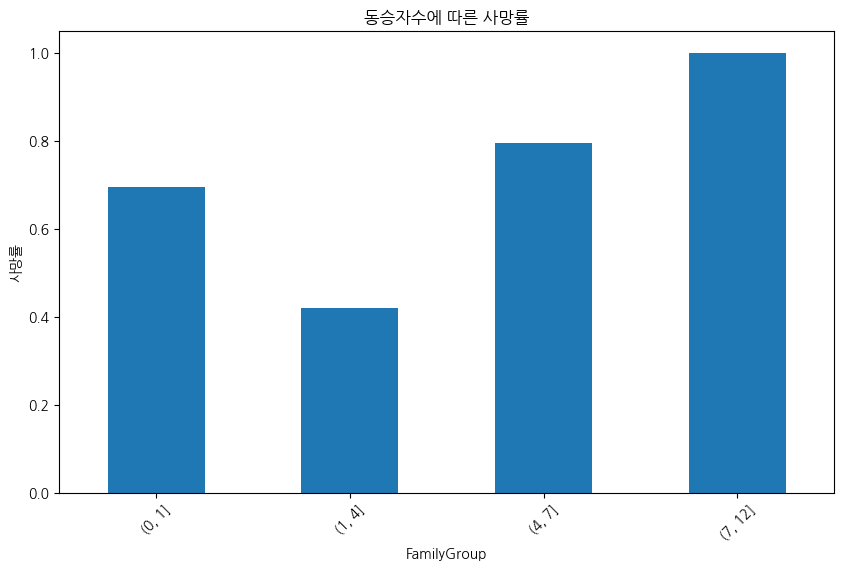

In [80]:
bins = [0,1,4,7,12]
df1['FamilyGroup'] = pd.cut(df1['FamilySize'], bins=bins)

fs_ratio = df1.groupby('FamilyGroup')['Survived'].mean()

death_ratio = 1 - fs_ratio

death_ratio.plot(kind='bar', figsize=(10,6))
plt.ylabel('사망률')
plt.title('동승자수에 따른 사망률')
plt.xticks(rotation=45)
plt.show()

In [81]:
df1.ticket_count.max()

7

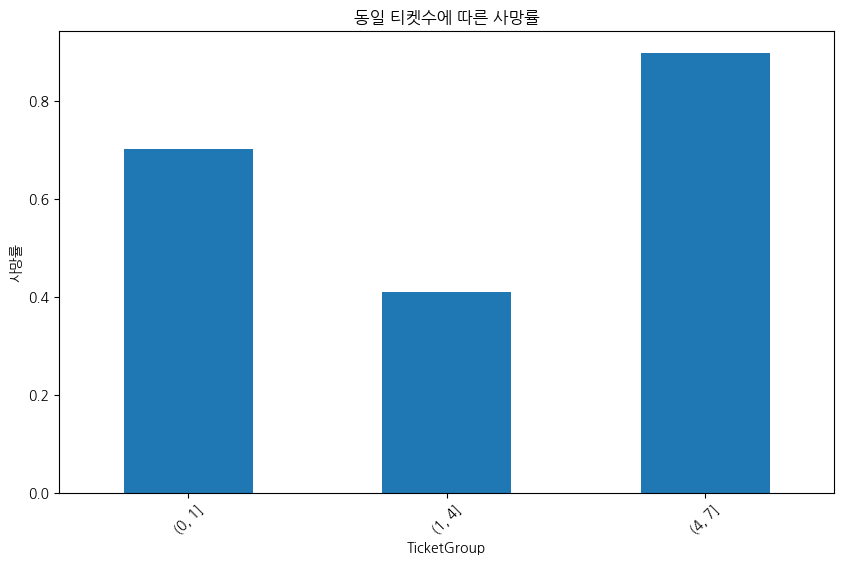

In [82]:
bins = [0,1,4,7]
df1['TicketGroup'] = pd.cut(df1['ticket_count'], bins=bins)

tc_ratio = df1.groupby('TicketGroup')['Survived'].mean()

death_ratio = 1 - tc_ratio

death_ratio.plot(kind='bar', figsize=(10,6))
plt.ylabel('사망률')
plt.title('동일 티켓수에 따른 사망률')
plt.xticks(rotation=45)
plt.show()

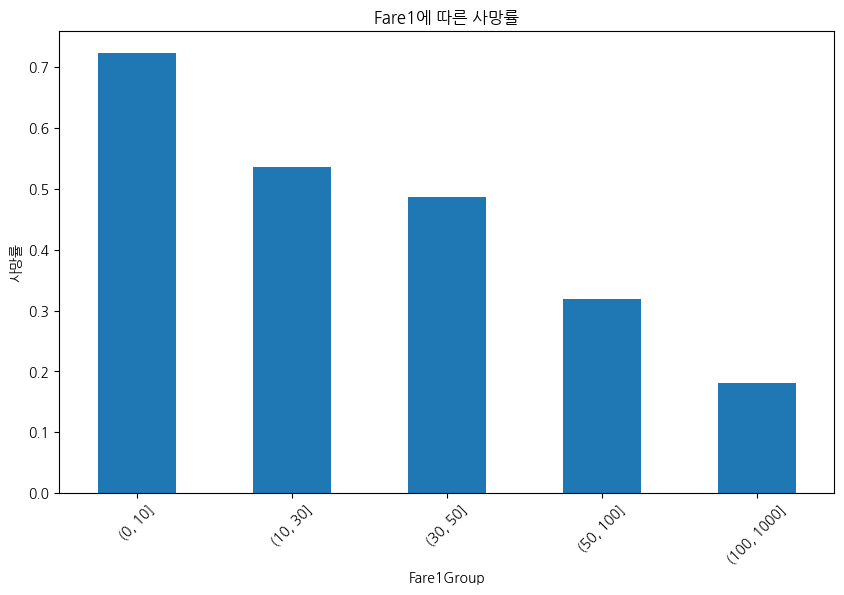

In [136]:
bins = [0,10,30,50,100,1000]
df1['Fare1Group'] = pd.cut(df1['Fare1'], bins=bins)

f1_ratio = df1.groupby('Fare1Group')['Survived'].mean()

death_ratio = 1 - f1_ratio

death_ratio.plot(kind='bar', figsize=(10,6))
plt.ylabel('사망률')
plt.title('Fare1에 따른 사망률')
plt.xticks(rotation=45)
plt.show()

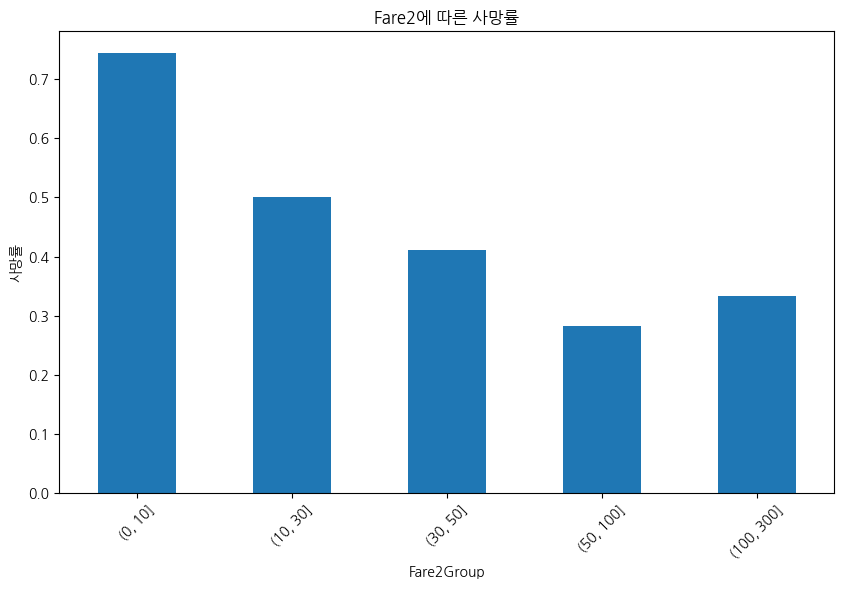

In [84]:
bins = [0,10,30,50,100,300]
df1['Fare2Group'] = pd.cut(df1['Fare2'], bins=bins)

f2_ratio = df1.groupby('Fare2Group')['Survived'].mean()

death_ratio = 1 - f2_ratio

death_ratio.plot(kind='bar', figsize=(10,6))
plt.ylabel('사망률')
plt.title('Fare2에 따른 사망률')
plt.xticks(rotation=45)
plt.show()

In [85]:
df1[df1.Fare2>100]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,FamilySize,SexCode,AgeGroup,Fare1,ticket_count,Fare2,FamilyGroup,TicketGroup,Fare1Group,Fare2Group
13,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,...,2,1.0,"(10.0, 30.0]",123.7604,2,123.7604,"(1, 4]","(1, 4]","(100.0, 300.0]","(100, 300]"
38,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,...,3,1.0,"(10.0, 30.0]",70.5000,1,211.5000,"(1, 4]","(0, 1]","(50.0, 100.0]","(100, 300]"
52,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,...,1,1.0,NaN,221.7792,1,221.7792,"(0, 1]","(0, 1]","(100.0, 300.0]","(100, 300]"
573,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,...,1,0.0,"(30.0, 60.0]",512.3292,3,170.7764,"(0, 1]","(1, 4]",NaN,"(100, 300]"
580,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,...,2,0.0,"(30.0, 60.0]",123.7604,2,123.7604,"(1, 4]","(1, 4]","(100.0, 300.0]","(100, 300]"
586,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,...,5,0.0,"(10.0, 30.0]",52.4750,2,131.1875,"(4, 7]","(1, 4]","(50.0, 100.0]","(100, 300]"
647,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,...,2,1.0,"(30.0, 60.0]",256.1646,3,170.7764,"(1, 4]","(1, 4]","(100.0, 300.0]","(100, 300]"
660,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,...,1,1.0,"(30.0, 60.0]",512.3292,3,170.7764,"(0, 1]","(1, 4]",NaN,"(100, 300]"
662,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,...,5,0.0,"(10.0, 30.0]",52.4750,2,131.1875,"(4, 7]","(1, 4]","(50.0, 100.0]","(100, 300]"


In [86]:
df1.Fare1Group.value_counts(),'==================', df1.Fare2Group.value_counts()

(Fare1Group
 (0, 10]       497
 (10, 30]      242
 (30, 50]       71
 (50, 100]      44
 (100, 300]     20
 Name: count, dtype: int64,
 '==================',
 Fare2Group
 (0, 10]       472
 (10, 30]      276
 (30, 50]       73
 (50, 100]      46
 (100, 300]      9
 Name: count, dtype: int64)

In [87]:
df1[df1.Ticket=='19972']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,FamilySize,SexCode,AgeGroup,Fare1,ticket_count,Fare2,FamilyGroup,TicketGroup,Fare1Group,Fare2Group
77,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,...,1,1.0,"(30, 60]",0.0,1,0.0,"(0, 1]","(0, 1]",NaN,NaN


In [88]:
df1[df1.Fare == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,FamilySize,SexCode,AgeGroup,Fare1,ticket_count,Fare2,FamilyGroup,TicketGroup,Fare1Group,Fare2Group
26,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,...,1,1.0,"(30.0, 60.0]",0.0,1,0.0,"(0, 1]","(0, 1]",NaN,NaN
61,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,...,1,1.0,NaN,0.0,1,0.0,"(0, 1]","(0, 1]",NaN,NaN
75,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,...,1,1.0,"(30.0, 60.0]",0.0,1,0.0,"(0, 1]","(0, 1]",NaN,NaN
76,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0,...,1,1.0,NaN,0.0,1,0.0,"(0, 1]","(0, 1]",NaN,NaN
77,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,...,1,1.0,"(30.0, 60.0]",0.0,1,0.0,"(0, 1]","(0, 1]",NaN,NaN
113,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,...,1,1.0,NaN,0.0,3,0.0,"(0, 1]","(1, 4]",NaN,NaN
128,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,...,1,1.0,NaN,0.0,3,0.0,"(0, 1]","(1, 4]",NaN,NaN
133,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,...,1,1.0,NaN,0.0,3,0.0,"(0, 1]","(1, 4]",NaN,NaN
135,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,...,1,1.0,NaN,0.0,1,0.0,"(0, 1]","(0, 1]",NaN,NaN
150,675,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0,...,1,1.0,NaN,0.0,1,0.0,"(0, 1]","(0, 1]",NaN,NaN


In [89]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   891 non-null    int64   
 1   Survived      891 non-null    int64   
 2   Pclass        891 non-null    int64   
 3   Name          891 non-null    object  
 4   Sex           891 non-null    object  
 5   Age           714 non-null    float64 
 6   SibSp         891 non-null    int64   
 7   Parch         891 non-null    int64   
 8   Ticket        891 non-null    object  
 9   Fare          891 non-null    float64 
 10  Cabin         204 non-null    object  
 11  Embarked      891 non-null    object  
 12  FamilySize    891 non-null    int64   
 13  SexCode       891 non-null    float64 
 14  AgeGroup      714 non-null    category
 15  Fare1         891 non-null    float64 
 16  ticket_count  891 non-null    int64   
 17  Fare2         891 non-null    float64 
 18  FamilyGrou

In [90]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,FamilySize,SexCode,AgeGroup,Fare1,ticket_count,Fare2,FamilyGroup,TicketGroup,Fare1Group,Fare2Group
0,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,1,1.0,"(30, 60]",51.862500,1,51.8625,"(0, 1]","(0, 1]","(50, 100]","(50, 100]"
1,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,...,6,1.0,"(10, 30]",43.833333,4,65.7500,"(4, 7]","(1, 4]","(30, 50]","(50, 100]"
2,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,...,1,1.0,"(30, 60]",27.720800,1,27.7208,"(0, 1]","(0, 1]","(10, 30]","(10, 30]"
3,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,...,2,1.0,"(10, 30]",41.085400,2,41.0854,"(1, 4]","(1, 4]","(30, 50]","(30, 50]"
4,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,...,2,1.0,"(30, 60]",26.000000,2,26.0000,"(1, 4]","(1, 4]","(10, 30]","(10, 30]"


In [99]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics

In [101]:
from sklearn.ensemble import RandomForestRegressor

In [104]:
df1[df1.Fare==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,FamilySize,SexCode,AgeGroup,Fare1,ticket_count,Fare2,FamilyGroup,TicketGroup,Fare1Group,Fare2Group
26,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,...,1,1.0,"(30.0, 60.0]",0.0,1,0.0,"(0, 1]","(0, 1]",NaN,NaN
61,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,...,1,1.0,NaN,0.0,1,0.0,"(0, 1]","(0, 1]",NaN,NaN
75,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,...,1,1.0,"(30.0, 60.0]",0.0,1,0.0,"(0, 1]","(0, 1]",NaN,NaN
76,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0,...,1,1.0,NaN,0.0,1,0.0,"(0, 1]","(0, 1]",NaN,NaN
77,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,...,1,1.0,"(30.0, 60.0]",0.0,1,0.0,"(0, 1]","(0, 1]",NaN,NaN
113,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,...,1,1.0,NaN,0.0,3,0.0,"(0, 1]","(1, 4]",NaN,NaN
128,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,...,1,1.0,NaN,0.0,3,0.0,"(0, 1]","(1, 4]",NaN,NaN
133,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,...,1,1.0,NaN,0.0,3,0.0,"(0, 1]","(1, 4]",NaN,NaN
135,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,...,1,1.0,NaN,0.0,1,0.0,"(0, 1]","(0, 1]",NaN,NaN
150,675,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0,...,1,1.0,NaN,0.0,1,0.0,"(0, 1]","(0, 1]",NaN,NaN


In [112]:
df_fare_input = df1[['Pclass','FamilyGroup','TicketGroup','SexCode']][df1.Fare1!=0]
df_fare_target = df1['Fare1'][df1.Fare1!=0]

In [119]:
df_fare_input_pred = df1[['Pclass','FamilyGroup','TicketGroup','SexCode']][df1.Fare1==0]
df_fare_target_pred = df1['Fare1'][df1.Fare1==0]

In [115]:
df_fare_input

,Pclass,FamilyGroup,TicketGroup,SexCode
0,1,"(0, 1]","(0, 1]",1.0
1,1,"(4, 7]","(1, 4]",1.0
2,1,"(0, 1]","(0, 1]",1.0
3,1,"(1, 4]","(1, 4]",1.0
4,1,"(1, 4]","(1, 4]",1.0
...,...,...,...,...
886,3,"(0, 1]","(4, 7]",1.0
887,3,"(1, 4]","(0, 1]",0.0
888,3,"(1, 4]","(1, 4]",0.0
889,3,"(1, 4]","(1, 4]",1.0


In [ ]:
# One-hot-encoding으로 Embarked 정리
df_fare_input = pd.get_dummies(data=df_fare_input, columns=['FamilyGroup','TicketGroup'])
df_fare_input.head()

,Pclass,SexCode,"FamilyGroup_(0, 1]","FamilyGroup_(1, 4]","FamilyGroup_(4, 7]","FamilyGroup_(7, 12]","TicketGroup_(0, 1]","TicketGroup_(1, 4]","TicketGroup_(4, 7]"
0,1,1.0,True,False,False,False,True,False,False
1,1,1.0,False,False,True,False,False,True,False
2,1,1.0,True,False,False,False,True,False,False
3,1,1.0,False,True,False,False,False,True,False
4,1,1.0,False,True,False,False,False,True,False


In [123]:
# One-hot-encoding으로 Embarked 정리
df_fare_input_pred = pd.get_dummies(data=df_fare_input_pred, columns=['FamilyGroup','TicketGroup'])
df_fare_input_pred.head()

,Pclass,SexCode,"FamilyGroup_(0, 1]","FamilyGroup_(1, 4]","FamilyGroup_(4, 7]","FamilyGroup_(7, 12]","TicketGroup_(0, 1]","TicketGroup_(1, 4]","TicketGroup_(4, 7]"
26,1,1.0,True,False,False,False,True,False,False
61,1,1.0,True,False,False,False,True,False,False
75,1,1.0,True,False,False,False,True,False,False
76,1,1.0,True,False,False,False,True,False,False
77,1,1.0,True,False,False,False,True,False,False


In [124]:
rfr = RandomForestRegressor()
rfr.fit(df_fare_input, df_fare_target)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
pred = rfr.predict(df_fare_input_pred)
pred

array([34.41099581, 34.41099581, 34.41099581, 34.41099581, 34.41099581,
       20.7949543 , 20.7949543 , 20.7949543 , 12.65044033, 12.65044033,
       12.65044033, 16.57810976, 16.57810976, 16.57810976, 16.57810976])

In [127]:
df1.loc[df1['Fare1']==0, 'Fare1'] = pred

In [151]:
df1[df1.Age.isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,FamilySize,SexCode,AgeGroup,Fare1,ticket_count,Fare2,FamilyGroup,TicketGroup,Fare1Group,Fare2Group
7,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,...,1,1.0,NaN,27.7208,1,27.7208,"(0, 1]","(0, 1]","(10, 30]","(10, 30]"
18,169,0,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,...,1,1.0,NaN,25.9250,1,25.9250,"(0, 1]","(0, 1]","(10, 30]","(10, 30]"
22,186,0,1,"Rood, Mr. Hugh Roscoe",male,NaN,0,0,113767,50.0000,...,1,1.0,NaN,50.0000,1,50.0000,"(0, 1]","(0, 1]","(30, 50]","(30, 50]"
27,271,0,1,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,...,1,1.0,NaN,31.0000,2,15.5000,"(0, 1]","(1, 4]","(30, 50]","(10, 30]"
29,285,0,1,"Smith, Mr. Richard William",male,NaN,0,0,113056,26.0000,...,1,1.0,NaN,26.0000,1,26.0000,"(0, 1]","(0, 1]","(10, 30]","(10, 30]"


In [154]:
df_age_input = df1[['Pclass','FamilyGroup','TicketGroup','Fare1Group','SexCode']][df1.Age.notnull()]
df_age_target = df1['Age'][df1.Age.notnull()]
df_age_pred = df1[['Pclass','FamilyGroup','TicketGroup','Fare1Group','SexCode']][df1.Age.isnull()]

In [155]:
# One-hot-encoding으로 Embarked 정리
df_age_input = pd.get_dummies(data=df_age_input, columns=['FamilyGroup','TicketGroup','Fare1Group'])
df_age_input.head()

,Pclass,SexCode,"FamilyGroup_(0, 1]","FamilyGroup_(1, 4]","FamilyGroup_(4, 7]","FamilyGroup_(7, 12]","TicketGroup_(0, 1]","TicketGroup_(1, 4]","TicketGroup_(4, 7]","Fare1Group_(0, 10]","Fare1Group_(10, 30]","Fare1Group_(30, 50]","Fare1Group_(50, 100]","Fare1Group_(100, 1000]"
0,1,1.0,True,False,False,False,True,False,False,False,False,False,True,False
1,1,1.0,False,False,True,False,False,True,False,False,False,True,False,False
2,1,1.0,True,False,False,False,True,False,False,False,True,False,False,False
3,1,1.0,False,True,False,False,False,True,False,False,False,True,False,False
4,1,1.0,False,True,False,False,False,True,False,False,True,False,False,False


In [156]:
# One-hot-encoding으로 Embarked 정리
df_age_pred = pd.get_dummies(data=df_age_pred, columns=['FamilyGroup','TicketGroup','Fare1Group'])
df_age_pred.head()

,Pclass,SexCode,"FamilyGroup_(0, 1]","FamilyGroup_(1, 4]","FamilyGroup_(4, 7]","FamilyGroup_(7, 12]","TicketGroup_(0, 1]","TicketGroup_(1, 4]","TicketGroup_(4, 7]","Fare1Group_(0, 10]","Fare1Group_(10, 30]","Fare1Group_(30, 50]","Fare1Group_(50, 100]","Fare1Group_(100, 1000]"
7,1,1.0,True,False,False,False,True,False,False,False,True,False,False,False
18,1,1.0,True,False,False,False,True,False,False,False,True,False,False,False
22,1,1.0,True,False,False,False,True,False,False,False,False,True,False,False
27,1,1.0,True,False,False,False,False,True,False,False,False,True,False,False
29,1,1.0,True,False,False,False,True,False,False,False,True,False,False,False


In [157]:
rfr = RandomForestRegressor()
rfr.fit(df_age_input, df_age_target)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [158]:
pred_age = rfr.predict(df_age_pred)
pred_age

array([46.3841867 , 46.3841867 , 46.71329923, 38.22387674, 46.3841867 ,
       46.3841867 , 46.71329923, 36.10940873, 42.58497287, 29.67519853,
       46.71329923, 46.71329923, 46.3841867 , 46.71329923, 46.71329923,
       46.71329923, 34.12659876, 36.59139676, 36.59139676, 36.59139676,
       34.12659876, 34.12659876, 34.12659876, 29.45503479, 29.45503479,
       29.45503479, 29.45503479, 29.45503479, 26.22619238, 26.22619238,
       29.45503479, 29.45503479, 29.45503479, 29.45503479, 29.45503479,
       29.45503479, 29.45503479, 19.43197922, 29.45503479, 29.45503479,
        9.46668609,  8.45555159, 27.21732847, 29.45503479,  9.46668609,
       26.22619238, 29.45503479, 19.46907961, 24.13998005, 19.43197922,
       29.45503479, 29.45503479, 24.13998005, 29.45503479,  9.46668609,
       29.45503479, 29.45503479, 20.45645309, 29.45503479, 29.45503479,
       19.46907961, 29.45503479, 29.45503479, 24.13998005, 29.45503479,
       29.45503479, 29.45503479, 26.22619238, 29.45503479, 29.45

In [159]:
df1.loc[df1['Age'].isnull(), 'Age'] = pred_age

In [160]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   891 non-null    int64   
 1   Survived      891 non-null    int64   
 2   Pclass        891 non-null    int64   
 3   Name          891 non-null    object  
 4   Sex           891 non-null    object  
 5   Age           891 non-null    float64 
 6   SibSp         891 non-null    int64   
 7   Parch         891 non-null    int64   
 8   Ticket        891 non-null    object  
 9   Fare          891 non-null    float64 
 10  Cabin         204 non-null    object  
 11  Embarked      891 non-null    object  
 12  FamilySize    891 non-null    int64   
 13  SexCode       891 non-null    float64 
 14  AgeGroup      714 non-null    category
 15  Fare1         891 non-null    float64 
 16  ticket_count  891 non-null    int64   
 17  Fare2         891 non-null    float64 
 18  FamilyGrou

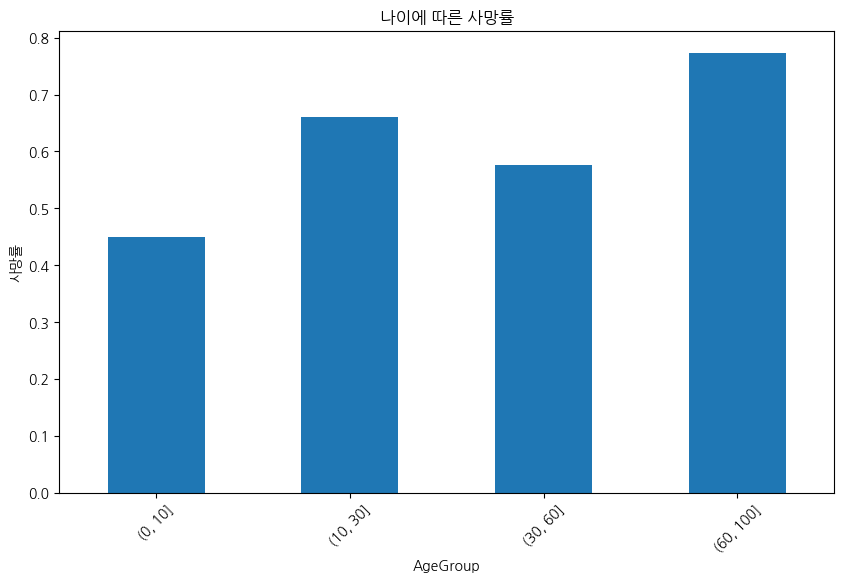

In [162]:
bins = [0,10,30,60,100]
df1['AgeGroup'] = pd.cut(df1['Age'], bins=bins)

age_ratio = df1.groupby('AgeGroup')['Survived'].mean()

death_ratio = 1 - age_ratio

death_ratio.plot(kind='bar', figsize=(10,6))
plt.ylabel('사망률')
plt.title('나이에 따른 사망률')
plt.xticks(rotation=45)
plt.show()

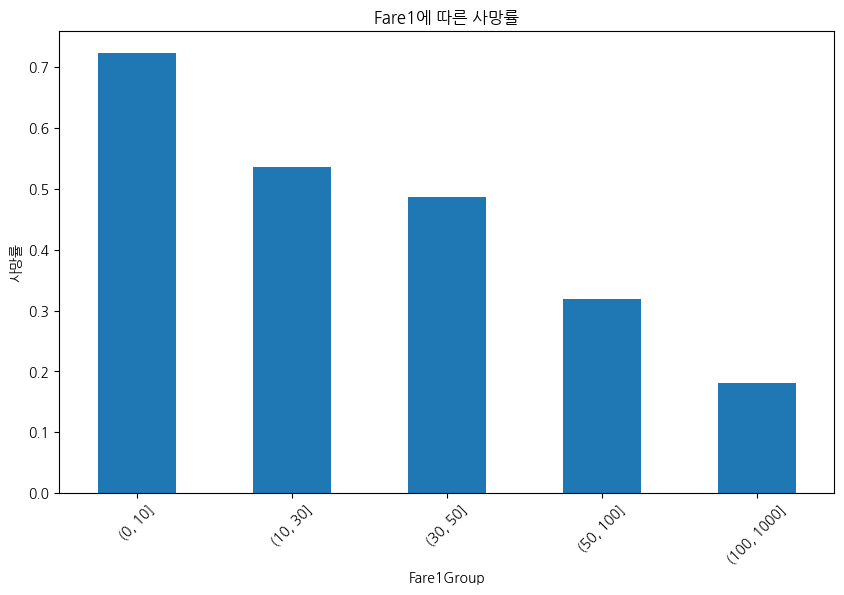

In [163]:
bins = [0,10,30,50,100,1000]
df1['Fare1Group'] = pd.cut(df1['Fare1'], bins=bins)

f1_ratio = df1.groupby('Fare1Group')['Survived'].mean()

death_ratio = 1 - f1_ratio

death_ratio.plot(kind='bar', figsize=(10,6))
plt.ylabel('사망률')
plt.title('Fare1에 따른 사망률')
plt.xticks(rotation=45)
plt.show()

In [164]:
df2=df1

In [165]:
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,FamilySize,SexCode,AgeGroup,Fare1,ticket_count,Fare2,FamilyGroup,TicketGroup,Fare1Group,Fare2Group
0,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,1,1.0,"(30, 60]",51.862500,1,51.8625,"(0, 1]","(0, 1]","(50, 100]","(50, 100]"
1,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,...,6,1.0,"(10, 30]",43.833333,4,65.7500,"(4, 7]","(1, 4]","(30, 50]","(50, 100]"
2,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,...,1,1.0,"(30, 60]",27.720800,1,27.7208,"(0, 1]","(0, 1]","(10, 30]","(10, 30]"
3,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,...,2,1.0,"(10, 30]",41.085400,2,41.0854,"(1, 4]","(1, 4]","(30, 50]","(30, 50]"
4,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,...,2,1.0,"(30, 60]",26.000000,2,26.0000,"(1, 4]","(1, 4]","(10, 30]","(10, 30]"


In [166]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   891 non-null    int64   
 1   Survived      891 non-null    int64   
 2   Pclass        891 non-null    int64   
 3   Name          891 non-null    object  
 4   Sex           891 non-null    object  
 5   Age           891 non-null    float64 
 6   SibSp         891 non-null    int64   
 7   Parch         891 non-null    int64   
 8   Ticket        891 non-null    object  
 9   Fare          891 non-null    float64 
 10  Cabin         204 non-null    object  
 11  Embarked      891 non-null    object  
 12  FamilySize    891 non-null    int64   
 13  SexCode       891 non-null    float64 
 14  AgeGroup      891 non-null    category
 15  Fare1         891 non-null    float64 
 16  ticket_count  891 non-null    int64   
 17  Fare2         891 non-null    float64 
 18  FamilyGrou

In [168]:
dfdf = df2.iloc[:,[1,2,11,13,14,15,18,20]]
dfdf.head()

,Survived,Pclass,Embarked,SexCode,AgeGroup,Fare1,FamilyGroup,Fare1Group
0,0,1,S,1.0,"(30, 60]",51.862500,"(0, 1]","(50, 100]"
1,0,1,S,1.0,"(10, 30]",43.833333,"(4, 7]","(30, 50]"
2,0,1,C,1.0,"(30, 60]",27.720800,"(0, 1]","(10, 30]"
3,0,1,C,1.0,"(10, 30]",41.085400,"(1, 4]","(30, 50]"
4,0,1,S,1.0,"(30, 60]",26.000000,"(1, 4]","(10, 30]"


In [169]:
# One-hot-encoding으로 Embarked 정리
dfdf = pd.get_dummies(data=dfdf, columns=['Embarked', 'AgeGroup','FamilyGroup', 'Fare1Group'])
dfdf.head()

,Survived,Pclass,SexCode,Fare1,Embarked_C,Embarked_Q,Embarked_S,"AgeGroup_(0, 10]","AgeGroup_(10, 30]","AgeGroup_(30, 60]","AgeGroup_(60, 100]","FamilyGroup_(0, 1]","FamilyGroup_(1, 4]","FamilyGroup_(4, 7]","FamilyGroup_(7, 12]","Fare1Group_(0, 10]","Fare1Group_(10, 30]","Fare1Group_(30, 50]","Fare1Group_(50, 100]","Fare1Group_(100, 1000]"
0,0,1,1.0,51.862500,False,False,True,False,False,True,False,True,False,False,False,False,False,False,True,False
1,0,1,1.0,43.833333,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False,False
2,0,1,1.0,27.720800,True,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False
3,0,1,1.0,41.085400,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False
4,0,1,1.0,26.000000,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False


In [175]:
dfdf.rename(
    columns = {
        'AgeGroup_(0, 10]':'AgeGroup1',
        'AgeGroup_(10, 30]':'AgeGroup2',
        'AgeGroup_(30, 60]':'AgeGroup3',
        'AgeGroup_(60, 100]':'AgeGroup4',
        'FamilyGroup_(0, 1]':'FamilyGroup1',
        'FamilyGroup_(1, 4]':'FamilyGroup2',
        'FamilyGroup_(4, 7]':'FamilyGroup3',
        'FamilyGroup_(7, 12]':'FamilyGroup4',
        'Fare1Group_(0, 10]':'Fare1Group1',
        'Fare1Group_(10, 30]':'Fare1Group2',
        'Fare1Group_(30, 50]':'Fare1Group3',
        'Fare1Group_(50, 100]':'Fare1Group4',
        'Fare1Group_(100, 1000]':'Fare1Group5'
    },
    inplace=True
)
dfdf.head()

,Survived,Pclass,SexCode,Fare1,Embarked_C,Embarked_Q,Embarked_S,AgeGroup1,AgeGroup2,AgeGroup3,AgeGroup4,FamilyGroup1,FamilyGroup2,FamilyGroup3,FamilyGroup4,Fare1Group1,Fare1Group2,Fare1Group3,Fare1Group4,Fare1Group5
0,0,1,1.0,51.862500,False,False,True,False,False,True,False,True,False,False,False,False,False,False,True,False
1,0,1,1.0,43.833333,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False,False
2,0,1,1.0,27.720800,True,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False
3,0,1,1.0,41.085400,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False
4,0,1,1.0,26.000000,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False


In [176]:
train_input, test_input, train_target, test_target = train_test_split(dfdf.iloc[:,1:], dfdf['Survived'], random_state=42, stratify=dfdf['Survived'])

In [180]:
rf = RandomForestClassifier()
rf.fit(train_input, train_target)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [181]:
print("Train Score :", rf.score(train_input,train_target))
print("Test Score  :", rf.score(test_input,test_target))

Train Score : 0.9356287425149701
Test Score  : 0.8071748878923767


In [185]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [186]:
def find_param(trial):
    max_depth = trial.suggest_int('max_depth', 2, 20)

    clf = XGBClassifier(
        max_depth=max_depth,
        random_state=42
    )

    return cross_val_score(clf, train_input, train_target, cv=5).mean()

In [187]:
study = optuna.create_study(direction='maximize')
study.optimize(find_param, n_trials=50)

print("최적 파라미터 :", study.best_params)

[I 2026-02-24 16:28:29,777] A new study created in memory with name: no-name-8c446a43-250b-4803-ba26-0523d69befea
[I 2026-02-24 16:28:30,524] Trial 0 finished with value: 0.7948939512961507 and parameters: {'max_depth': 14}. Best is trial 0 with value: 0.7948939512961507.
[I 2026-02-24 16:28:30,830] Trial 1 finished with value: 0.8023790820334419 and parameters: {'max_depth': 10}. Best is trial 1 with value: 0.8023790820334419.
[I 2026-02-24 16:28:31,078] Trial 2 finished with value: 0.8038716193468748 and parameters: {'max_depth': 7}. Best is trial 2 with value: 0.8038716193468748.
[I 2026-02-24 16:28:31,380] Trial 3 finished with value: 0.8008753226349455 and parameters: {'max_depth': 12}. Best is trial 2 with value: 0.8038716193468748.
[I 2026-02-24 16:28:31,700] Trial 4 finished with value: 0.7978902480080798 and parameters: {'max_depth': 15}. Best is trial 2 with value: 0.8038716193468748.
[I 2026-02-24 16:28:32,019] Trial 5 finished with value: 0.7963864886095836 and parameters: 

최적 파라미터 : {'max_depth': 2}


In [193]:
xgb = XGBClassifier(tree_method = 'hist', random_state = 42, use_label_encoder = False, eval_metric = 'logloss', max_depth=2)
scores = cross_validate(xgb, train_input, train_target, return_train_score=True, n_jobs=-1)

xgb = XGBClassifier(tree_method = 'hist', random_state = 42, use_label_encoding = False, eval_metrics = 'logloss', max_depth=2)

xgb.fit(train_input, train_target)


print("Train Score :", xgb.score(train_input,train_target))
print("Test Score  :", xgb.score(test_input,test_target))

Train Score : 0.8817365269461078
Test Score  : 0.8654708520179372


In [192]:
xgb = XGBClassifier(tree_method = 'hist', random_state = 42, use_label_encoder = False, eval_metric = 'logloss', max_depth=3)
scores = cross_validate(xgb, train_input, train_target, return_train_score=True, n_jobs=-1)

xgb = XGBClassifier(tree_method = 'hist', random_state = 42, use_label_encoding = False, eval_metrics = 'logloss', max_depth=3)

xgb.fit(train_input, train_target)


print("Train Score :", xgb.score(train_input,train_target))
print("Test Score  :", xgb.score(test_input,test_target))

Train Score : 0.8982035928143712
Test Score  : 0.8654708520179372
